# Video Recommendation based on the spoken content 

In [144]:
import pandas as pd
import json
import csv
import nltk
import numpy as np
from IPython.core.display import Image, display

In [8]:
with open ("podcast.json","r") as f:
    data = json.load(f)
    name = data['video_urls']
    
with open ("poscast.csv",'w') as f:
    fieldname = name[0].keys()
    writer = csv.DictWriter(f,fieldnames=fieldname)
    writer.writeheader()
    for name_ in name:
        writer.writerow(name_)

In [9]:
df = pd.read_csv("podcast.csv")
len(data['video_urls'])

100

In [10]:
df

,id,name,video_url,image_url,text
0,0,"@Gaur Gopal Das On His Childhood, Relationship...",https://www.youtube.com/watch?v=sBH-ngpL0zo&li...,https://i.ytimg.com/vi/sBH-ngpL0zo/hqdefault.j...,true story right after the episode Gaur Gopal ...
1,1,"Priyanka Chopra On Mental Health, Hollywood, G...",https://www.youtube.com/watch?v=eavpj-z5Y4Q&li...,https://i.ytimg.com/vi/eavpj-z5Y4Q/hqdefault.j...,the Ranveer show the most gorgeous guess that ...
2,2,"Dr. Vivek Bindra On Self Motivation, NoFap & T...",https://www.youtube.com/watch?v=WylKHt5SuMI&li...,https://i.ytimg.com/vi/WylKHt5SuMI/hqdefault.j...,simple Aisa mat Tik Tok bilkul Pasand Nahin ka...
3,3,"Ayushmann Khurrana's Life Hacks on Confidence,...",https://www.youtube.com/watch?v=d3R2-nW065U&li...,https://i.ytimg.com/vi/d3R2-nW065U/hqdefault.j...,this podcast to show you guys uncut unadultera...
4,4,"Rajkummar Rao On Initial Struggle, Career Hack...",https://www.youtube.com/watch?v=64z0focMWqI&li...,https://i.ytimg.com/vi/64z0focMWqI/hqdefault.j...,this time featuring who I call the Virat Kohli...
5,5,"@Shilpa Shetty Kundra's Secrets To A Rich, Spi...",https://www.youtube.com/watch?v=QLUxKjPx0KU&li...,https://i.ytimg.com/vi/QLUxKjPx0KU/hqdefault.j...,the external world becomes a reflection of you...
6,6,"@Tanmay Bhat On His Comeback, Weight Loss, AIB...",https://www.youtube.com/watch?v=2UDczkt_vaI&li...,https://i.ytimg.com/vi/2UDczkt_vaI/hqdefault.j...,she was one of my first personal coaching clie...
7,7,When I Met My Idol - Arnold Schwarzenegger | T...,https://www.youtube.com/watch?v=WYNRt-AwoUg&li...,https://i.ytimg.com/vi/WYNRt-AwoUg/hqdefault.j...,in my room and every state I listen to Arnold ...
8,8,"Tamannaah Bhatia On Relationships, Career Grow...",https://www.youtube.com/watch?v=klMP7sMFtDw&li...,https://i.ytimg.com/vi/klMP7sMFtDw/hqdefault.j...,I want some heavy should medication and other ...
9,9,"@Jay Shetty On Meditation, Spirituality & How ...",https://www.youtube.com/watch?v=AUrXa4GFTMk&li...,https://i.ytimg.com/vi/AUrXa4GFTMk/hqdefault.j...,newswing sometimes That Got Away and and that ...


In [11]:
df1 = df.drop(['video_url','image_url'] , axis = 1 )

In [12]:
df1.head()

,id,name,text
0,0,"@Gaur Gopal Das On His Childhood, Relationship...",true story right after the episode Gaur Gopal ...
1,1,"Priyanka Chopra On Mental Health, Hollywood, G...",the Ranveer show the most gorgeous guess that ...
2,2,"Dr. Vivek Bindra On Self Motivation, NoFap & T...",simple Aisa mat Tik Tok bilkul Pasand Nahin ka...
3,3,"Ayushmann Khurrana's Life Hacks on Confidence,...",this podcast to show you guys uncut unadultera...
4,4,"Rajkummar Rao On Initial Struggle, Career Hack...",this time featuring who I call the Virat Kohli...


In [13]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text) 
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [14]:
df1['name'] = df1['name'].map(str).apply(clean_txt)
df1['text'] = df1['text'].map(str).apply(clean_txt)

In [16]:
df1.head()

,id,name,text
0,0,gaur gopal das childhood relationships life le...,true story right episode gaur gopal das post m...
1,1,priyanka chopra mental health hollywood goals ...,ranveer show gorgeous guess show priyanka chop...
2,2,vivek bindra self motivation nofap future busi...,simple aisa mat tik tok bilkul pasand nahin ka...
3,3,ayushmann khurranas life hack confidence spiri...,podcast show guy uncut unadulterated intellige...
4,4,rajkummar rao initial struggle career hack bol...,time feature call virat kohli hindi film indus...


In [17]:
import sklearn 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_text = tfidf_vectorizer.fit_transform((df1['text'])) #fitting and transforming the vector
tfidf_name = tfidf_vectorizer.fit_transform((df1['name'])) #fitting and transforming the vector
print(tfidf_text)
tfidf_name

  (0, 21884)	0.017673792377008966
  (0, 19854)	0.012487421770181905
  (0, 17700)	0.08435741257420085
  (0, 6648)	0.013417525377097637
  (0, 7978)	0.037005763281284985
  (0, 8289)	0.028745867602313516
  (0, 5061)	0.03395728154757293
  (0, 16265)	0.009410386008139912
  (0, 13320)	0.011442707163947947
  (0, 12220)	0.05315304700198031
  (0, 10008)	0.0031861194854676646
  (0, 5564)	0.022361182586017155
  (0, 6949)	0.03861975183248143
  (0, 5204)	0.011433925203468484
  (0, 22368)	0.052381847235991104
  (0, 4590)	0.005091519326027547
  (0, 7286)	0.00958195586743784
  (0, 13503)	0.11319093849190978
  (0, 10568)	0.00965664065401453
  (0, 14140)	0.01918045611063192
  (0, 10179)	0.012366612692297106
  (0, 16102)	0.01085188507742672
  (0, 301)	0.03389663074751943
  (0, 2964)	0.007458491563727111
  (0, 9071)	0.005907080043524228
  :	:
  (99, 5202)	0.008550504369975698
  (99, 14370)	0.008550504369975698
  (99, 7923)	0.008550504369975698
  (99, 23940)	0.008550504369975698
  (99, 8954)	0.0085505043699

<100x442 sparse matrix of type '<class 'numpy.float64'>'
	with 898 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_text,tfidf_text)
cos_sim

array([[1.        , 0.45311825, 0.13353753, ..., 0.56097965, 0.42449173,
        0.60875476],
       [0.45311825, 1.        , 0.05015142, ..., 0.45510946, 0.31051131,
        0.51883764],
       [0.13353753, 0.05015142, 1.        , ..., 0.11784194, 0.07541893,
        0.08335325],
       ...,
       [0.56097965, 0.45510946, 0.11784194, ..., 1.        , 0.38168316,
        0.62501262],
       [0.42449173, 0.31051131, 0.07541893, ..., 0.38168316, 1.        ,
        0.49114857],
       [0.60875476, 0.51883764, 0.08335325, ..., 0.62501262, 0.49114857,
        1.        ]])

In [19]:
#reverse mapping of index and title
indices = pd.Series(df1.index,index=df1['name']).drop_duplicates()
indices

name
gaur gopal das childhood relationships life lessons spirituality ranveer show            0
priyanka chopra mental health hollywood goals motivation ranveer show                    1
vivek bindra self motivation nofap future business india ranveer show                    2
ayushmann khurranas life hack confidence spirituality fitness ranveer show               3
rajkummar rao initial struggle career hack bollywood success secrets ranveer show        4
shilpa shetty kundras secrets rich spiritual peaceful life ranveer show                  5
tanmay bhat comeback weight loss aib finance ranveer show                                6
meet idol arnold schwarzenegger terminator dark fate ranveer show                        7
tamannaah bhatia relationships career growth mentality covid experience ranveer show     8
jay shetty meditation spirituality think like monk ranveer show                          9
kamasutra sex romance secrets seema anand storytelling ranveer show                  

In [118]:
for i in range(0,len(data['video_urls'])):
    df['image_url'][i] = df['image_url'][i].split('?')[0]
    
df

C:\Users\shanjay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,name,video_url,image_url,text
0,0,"@Gaur Gopal Das On His Childhood, Relationship...",https://www.youtube.com/watch?v=sBH-ngpL0zo&li...,https://i.ytimg.com/vi/sBH-ngpL0zo/hqdefault.jpg,true story right after the episode Gaur Gopal ...
1,1,"Priyanka Chopra On Mental Health, Hollywood, G...",https://www.youtube.com/watch?v=eavpj-z5Y4Q&li...,https://i.ytimg.com/vi/eavpj-z5Y4Q/hqdefault.jpg,the Ranveer show the most gorgeous guess that ...
2,2,"Dr. Vivek Bindra On Self Motivation, NoFap & T...",https://www.youtube.com/watch?v=WylKHt5SuMI&li...,https://i.ytimg.com/vi/WylKHt5SuMI/hqdefault.jpg,simple Aisa mat Tik Tok bilkul Pasand Nahin ka...
3,3,"Ayushmann Khurrana's Life Hacks on Confidence,...",https://www.youtube.com/watch?v=d3R2-nW065U&li...,https://i.ytimg.com/vi/d3R2-nW065U/hqdefault.jpg,this podcast to show you guys uncut unadultera...
4,4,"Rajkummar Rao On Initial Struggle, Career Hack...",https://www.youtube.com/watch?v=64z0focMWqI&li...,https://i.ytimg.com/vi/64z0focMWqI/hqdefault.jpg,this time featuring who I call the Virat Kohli...
5,5,"@Shilpa Shetty Kundra's Secrets To A Rich, Spi...",https://www.youtube.com/watch?v=QLUxKjPx0KU&li...,https://i.ytimg.com/vi/QLUxKjPx0KU/hqdefault.jpg,the external world becomes a reflection of you...
6,6,"@Tanmay Bhat On His Comeback, Weight Loss, AIB...",https://www.youtube.com/watch?v=2UDczkt_vaI&li...,https://i.ytimg.com/vi/2UDczkt_vaI/hqdefault.jpg,she was one of my first personal coaching clie...
7,7,When I Met My Idol - Arnold Schwarzenegger | T...,https://www.youtube.com/watch?v=WYNRt-AwoUg&li...,https://i.ytimg.com/vi/WYNRt-AwoUg/hqdefault.jpg,in my room and every state I listen to Arnold ...
8,8,"Tamannaah Bhatia On Relationships, Career Grow...",https://www.youtube.com/watch?v=klMP7sMFtDw&li...,https://i.ytimg.com/vi/klMP7sMFtDw/hqdefault.jpg,I want some heavy should medication and other ...
9,9,"@Jay Shetty On Meditation, Spirituality & How ...",https://www.youtube.com/watch?v=AUrXa4GFTMk&li...,https://i.ytimg.com/vi/AUrXa4GFTMk/hqdefault.jpg,newswing sometimes That Got Away and and that ...


In [162]:
def recommendations(title, cos_sim = cos_sim):
    idx = indices[title]
    similarity_scores = list(enumerate(cos_sim[idx]))
    similarity_scores = sorted(similarity_scores,key=lambda x : x[1],reverse=True)

    similarity_scores = similarity_scores[1:6]
    
    #top_5 podcasts recommending based on content of title typed by our user
    pod_indices = [i[0] for i in similarity_scores]
    return pod_indices

In [163]:
recommendations('shilpa shetty kundras secrets rich spiritual peaceful life ranveer show')

[8, 99, 9, 54, 6]

In [266]:
def most_related_videos(recommendations_array):
    #1 element 2D array
    if len(recommendations_array)==1:
        for i in range(0,5):
            print(recommendations_array[0][i],df1['name'].iloc[recommendations_array[0][i]])
            display(Image(df['image_url'].iloc[recommendations_array[0][i]],width=200, unconfined=True))
            print(df['video_url'].iloc[recommendations_array[0][i]])
            print('\n')
            
            
        
    else:
        #more than 1 element 2D array
        #adding first ranked videos for several headings
        rank = 0
        empty1 = []
        empty2 = []
        for i in range(0,len(recommendations_array)):
            rank+=1
            empty1.append(recommendations_array[i][0])
          
        #top 5 ranking
        for i in recommendations_array:
            for j in i:
                no_of_times_repeated = 0
                for k in range(0,len(recommendations_array)):
                    if j in recommendations_array[k]:
                        no_of_times_repeated+=1
                    if no_of_times_repeated == len(recommendations_array):
                        if j not in empty1:
                            empty1.append(j)
                            rank+=1
            
          
        for i in empty1:
            if i not in empty2:
                empty2.append(i)
                
       
        for i in range(0,len(recommendations_array)):
            j=1
            if rank==2:
                if recommendations_array[i][j] not in empty2:
                    empty2.append(recommendations_array[i][1])
                    rank+=1
            if rank==3:
                if recommendations_array[i][j] not in empty2:
                    empty2.append(recommendations_array[i][1])
                    rank+=1
            if rank==4:
                if recommendations_array[i][j] not in empty2:
                    empty2.append(recommendations_array[i][1])
                    rank+=1
            j+=1       
            if rank == 5:
                break
        for i in empty2:
            print(i,df1['name'].iloc[i]) 
            display(Image(df['image_url'].iloc[i],width=200, unconfined=True))
            print(df['video_url'].iloc[i]) 
            print('\n')
            
            
            
            
def recommender_function(word):
    recommendations_array = []
    for i in range(0,len(data['video_urls'])):
        if word in df1['name'][i]:
            recommendations_array.append(recommendations(df1['name'][i]))
    most_related_videos(recommendations_array)
    return recommendations_array
 


Explicit topics with the searched keyword
1 priyanka chopra mental health hollywood goals motivation ranveer show


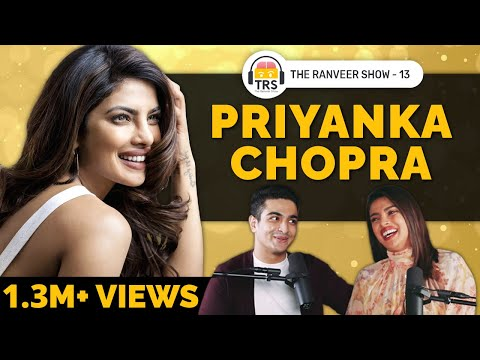

https://www.youtube.com/watch?v=eavpj-z5Y4Q&list=PLfNW_1ECVaThQynVe4QDlBM5S6Kzy8CeJ&index=2


2 vivek bindra self motivation nofap future business india ranveer show


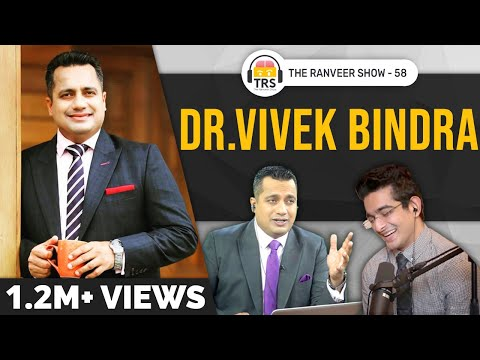

https://www.youtube.com/watch?v=WylKHt5SuMI&list=PLfNW_1ECVaThQynVe4QDlBM5S6Kzy8CeJ&index=3


33 tiger shroff dragon ball fitness ambition motivation legacy ranveer show


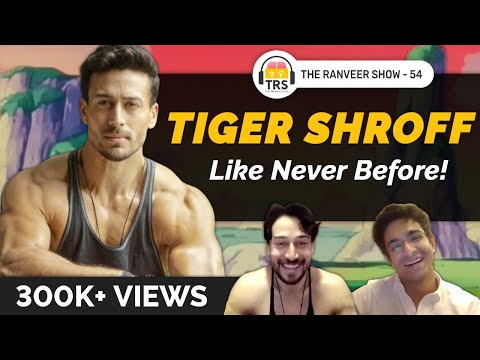

https://www.youtube.com/watch?v=K5wIweyB-xM&list=PLfNW_1ECVaThQynVe4QDlBM5S6Kzy8CeJ&index=34


68 want next level motivation watch nba stories nba explain ranveer show


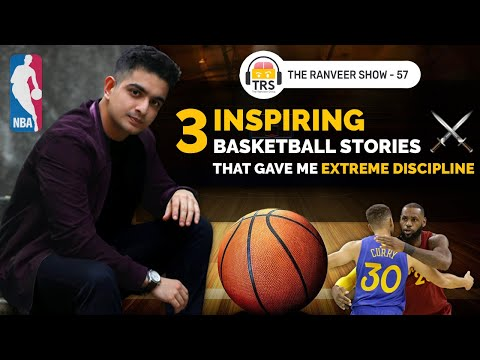

https://www.youtube.com/watch?v=uP-StcmZ4mU&list=PLfNW_1ECVaThQynVe4QDlBM5S6Kzy8CeJ&index=69


top5 recommendation

8 tamannaah bhatia relationships career growth mentality covid experience ranveer show


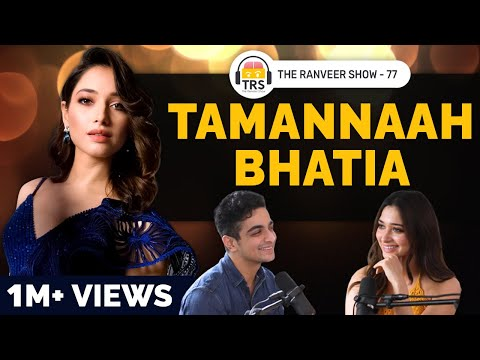

https://www.youtube.com/watch?v=klMP7sMFtDw&list=PLfNW_1ECVaThQynVe4QDlBM5S6Kzy8CeJ&index=9


41 raftaar career secrets life goals rap culture india ranveer show


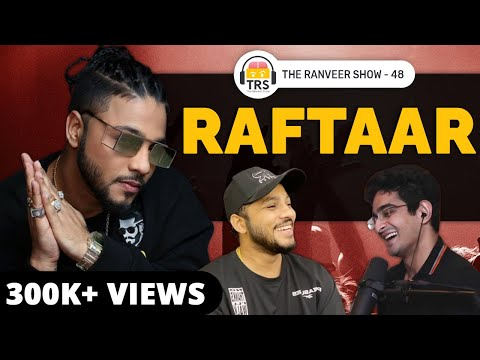

https://www.youtube.com/watch?v=Q_YAiVux8TY&list=PLfNW_1ECVaThQynVe4QDlBM5S6Kzy8CeJ&index=42


69 prateek kuhad love life learn songwriting process success mantras ranveer show


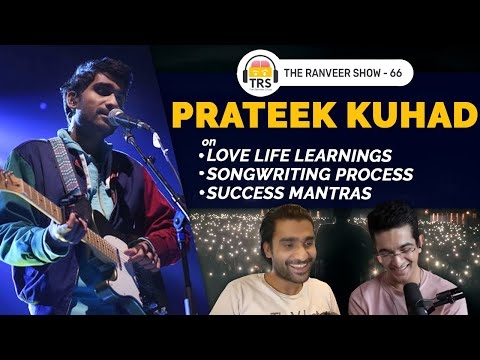

https://www.youtube.com/watch?v=j7o7DAy52P8&list=PLfNW_1ECVaThQynVe4QDlBM5S6Kzy8CeJ&index=70


71 glenn mcgrath mental fitness career stories australia ranveer show


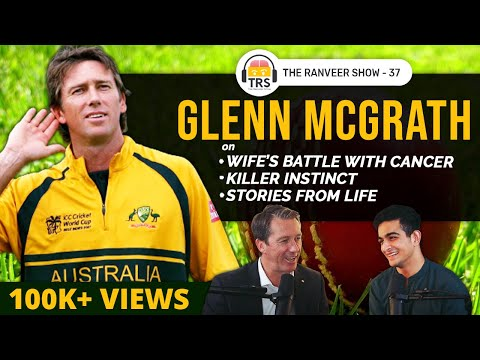

https://www.youtube.com/watch?v=gTx46TTUcb0&list=PLfNW_1ECVaThQynVe4QDlBM5S6Kzy8CeJ&index=72


56 siddharth roy kapur bollywood failures success leadership ranveer show


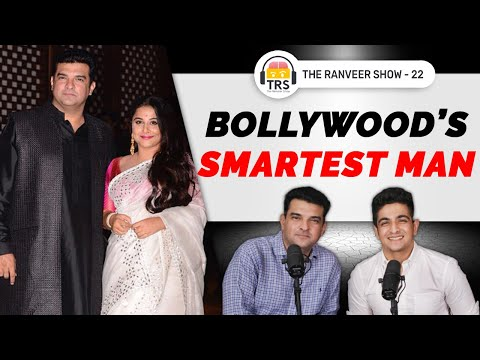

https://www.youtube.com/watch?v=41i2MgvSrcY&list=PLfNW_1ECVaThQynVe4QDlBM5S6Kzy8CeJ&index=57


Recommended videos
 [[8, 56, 69, 54, 99], [41, 3, 80, 51, 31], [69, 8, 54, 16, 17], [71, 99, 45, 6, 43]]

iteration 1
8 tamannaah bhatia relationships career growth mentality covid experience ranveer show
56 siddharth roy kapur bollywood failures success leadership ranveer show
69 prateek kuhad love life learn songwriting process success mantras ranveer show
54 srishti dixit anxiety mental health meditation hack ranveer show
99 luke coutinho mental health brain train success ranveer show

iteration 2
41 raftaar career secrets life goals rap culture india ranveer show
3 ayushmann khurranas life hack confidence spirituality fitness ranveer show
80 face death live indias vegan mountaineer kuntal joisher ranveer show
51 self make media crorepati sahil khattar simple success secrets ranveer show
31 ashish chanchlani youtube growth hack bollywood career inspirations ranveer show

iteration 3
69 pra

In [268]:
print('Explicit topics with the searched keyword')
word = 'motivation'
for i in range(0,len(data['video_urls'])):
        if word in df1['name'][i]:
            print(i,df1['name'][i])
            display(Image(df['image_url'].iloc[i],width=200, unconfined=True))
            print(df['video_url'].iloc[i]) 
            print('\n')
            
            
#top 5 recommendation 
print('top5 recommendation\n')
recommendations_array  = recommender_function(word)

#recommended videos
print("Recommended videos\n",recommendations_array)
count = 1
for i in recommendations_array:
    print('\niteration',count)
    count+=1
    for j in i:
        print(j,df1['name'].iloc[j])

In [25]:
def word_finder(word):
     for i in range(0,len(data['video_urls'])):
        if word in df1['text'][i]:
            print(i,df1['name'][i])

In [263]:
word_finder('shilpa shetty')

5 shilpa shetty kundras secrets rich spiritual peaceful life ranveer show
99 luke coutinho mental health brain train success ranveer show
